# **Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

# **Data Collection**

In [5]:
# load the data from csv file to Pandas Dataframe
titanic_data = pd.read_csv('/content/train.csv')

# **Data Processing**

In [6]:
#printing the first 5 rows of the Dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# number of rows and columns
titanic_data.shape

(891, 12)

In [7]:
# info about  titanic dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Data Cleaning**

In [8]:
# check the number of missing values in each column
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Handling the Missing values


In [9]:
# drop the 'cabin' column from Dataframe
titanic_data = titanic_data.drop(columns='Cabin',axis =1)

In [10]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [11]:
# finding the mode value of 'Embarked' column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [12]:
print(titanic_data['Embarked'].mode()[0])

S


In [13]:
# replacing the missing values in 'Embarked' column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [14]:
# check the number of missing values in each column
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# **DataAnalysis / Exploratory Data Analysis**


In [15]:
# getting some statistical measures about data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Visualization

In [16]:
titanic_data['Age'].value_counts()

,count
Age,
29.699118,177
24.000000,30
22.000000,27
18.000000,26
28.000000,25
...,...
24.500000,1
0.670000,1
0.420000,1


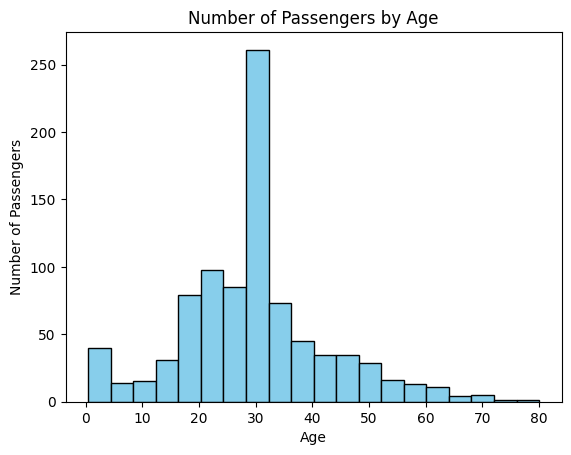

In [17]:
plt.hist(titanic_data['Age'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers by Age")
plt.show()

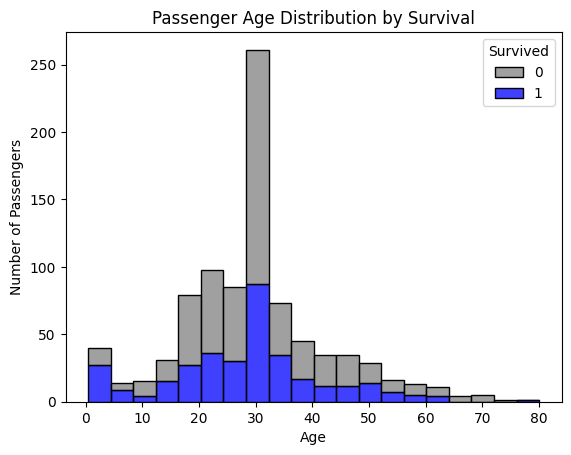

In [18]:
my_colors = ["grey","blue"]
sns.histplot(data=titanic_data, x='Age', hue='Survived', bins=20,multiple='stack',palette=my_colors)

# Labels and title
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Passenger Age Distribution by Survival")
plt.show()

In [19]:
# finding the number of people survived or not survived
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

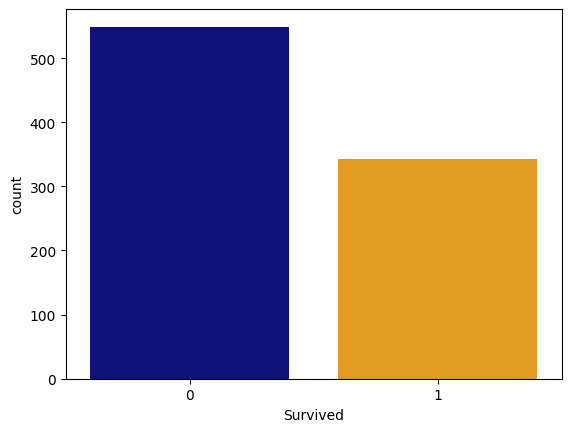

In [20]:
# making a count plot for survived column
my_colors = ["darkblue","orange"]
sns.countplot(x = 'Survived', data = titanic_data,palette=my_colors)

In [21]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

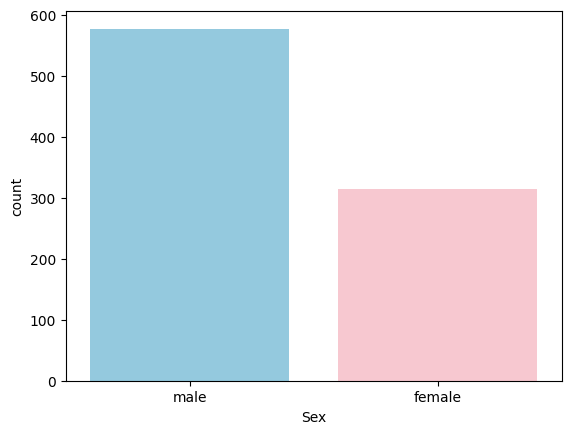

In [22]:
# making a count plot for "Sex" column
my_colors = ["skyblue","pink"]
sns.countplot(x ='Sex', data=titanic_data,palette=my_colors)

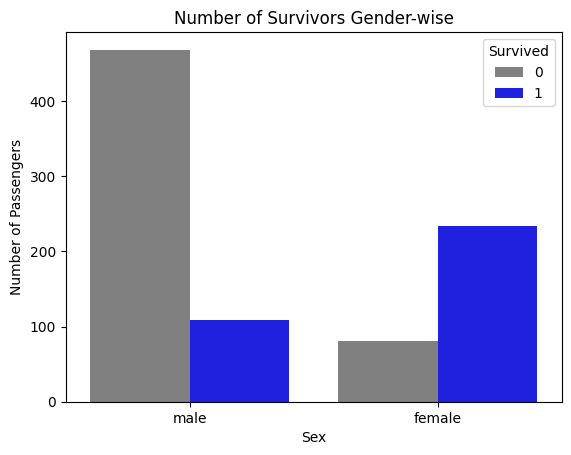

In [23]:
# number of survivors gender wise
my_colors = ["gray","blue"]
sns.countplot(x='Sex', hue='Survived', data=titanic_data,palette=my_colors)
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.title("Number of Survivors Gender-wise")
plt.show()

In [24]:
titanic_data['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


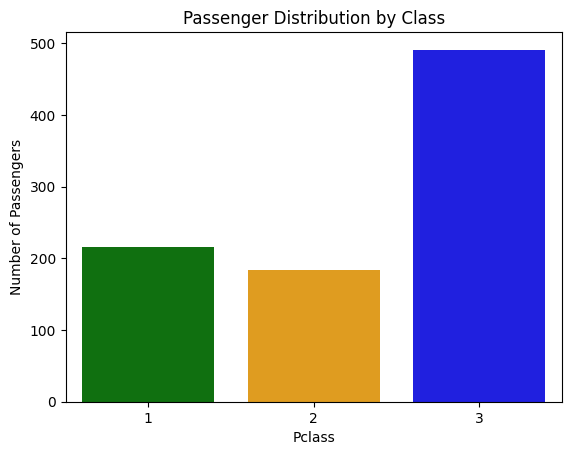

In [25]:
# making a count plot for "Pclass" column
my_colors = ["green","orange","blue"]
sns.countplot(x ='Pclass', data=titanic_data,palette=my_colors)
plt.xlabel("Pclass")
plt.ylabel("Number of Passengers")
plt.title("Passenger Distribution by Class")
plt.show()

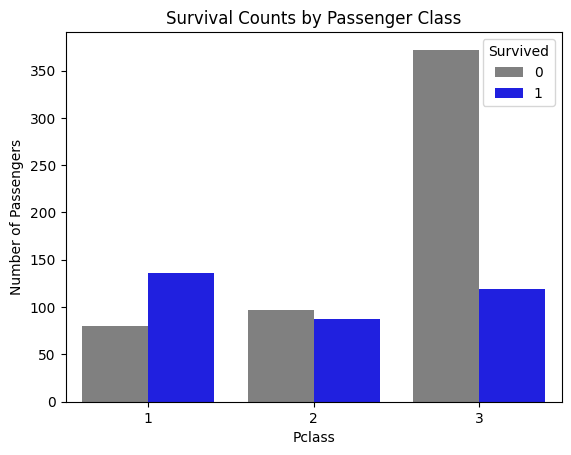

In [26]:
my_colors = ["gray","blue"]
sns.countplot(x ='Pclass', hue='Survived', data=titanic_data,palette=my_colors)
plt.xlabel("Pclass")
plt.ylabel("Number of Passengers")
plt.title("Survival Counts by Passenger Class")
plt.show()


In [27]:
titanic_data['Fare'].value_counts()

,count
Fare,
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
...,...
13.8583,1
50.4958,1
5.0000,1


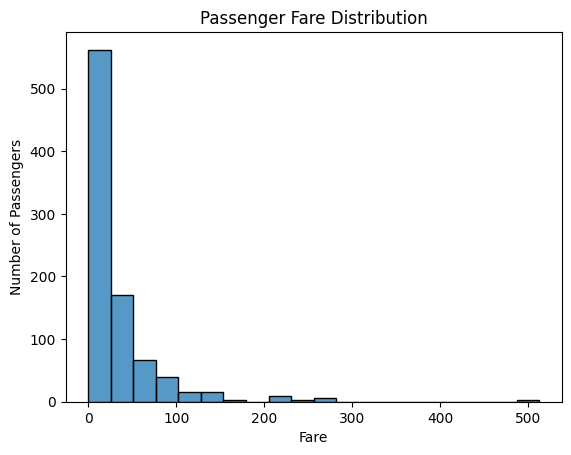

In [28]:
my_colors = ["blue"]
sns.histplot(x='Fare', data=titanic_data,bins = 20,palette=my_colors)
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.title("Passenger Fare Distribution")
plt.show()

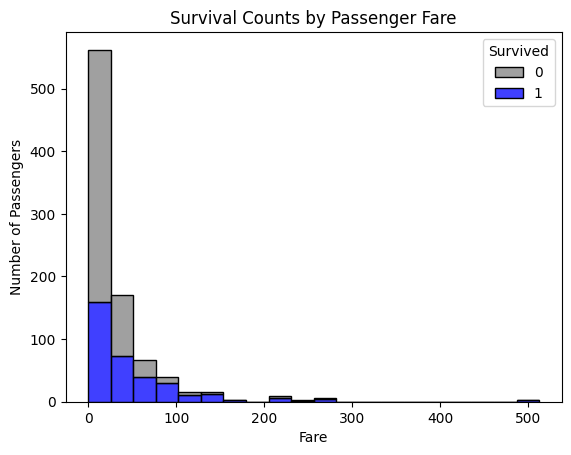

In [29]:
my_colors = ["gray","blue"]
sns.histplot(x ='Fare', hue='Survived',bins=20, data=titanic_data,palette=my_colors,multiple='stack')
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.title("Survival Counts by Passenger Fare")
plt.show()



In [30]:
top_tickets = titanic_data['Ticket'].value_counts().head(10)
print(top_tickets)

Ticket
347082          7
1601            7
CA. 2343        7
3101295         6
CA 2144         6
347088          6
382652          5
S.O.C. 14879    5
113760          4
19950           4
Name: count, dtype: int64


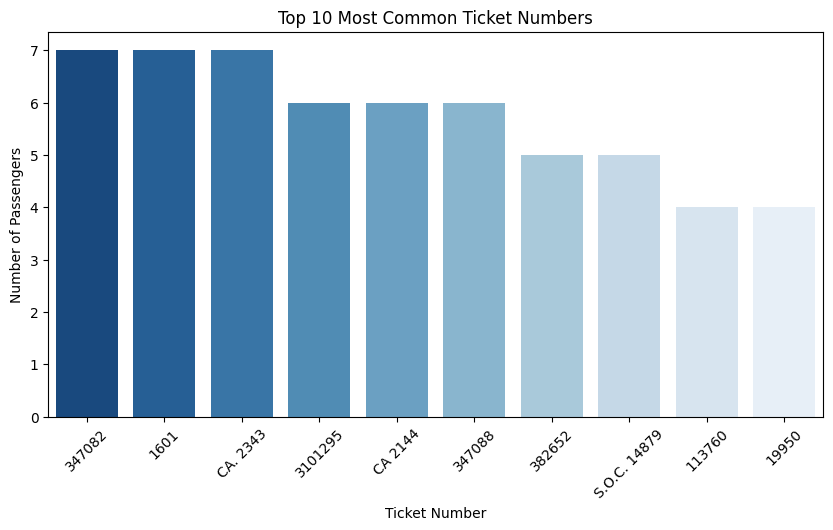

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_tickets.index, y=top_tickets.values, palette='Blues_r')
plt.xticks(rotation=45)
plt.xlabel("Ticket Number")
plt.ylabel("Number of Passengers")
plt.title("Top 10 Most Common Ticket Numbers")
plt.show()

# **Data Preprocessing**

## Encoding the Categorical Columns

In [32]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [33]:
titanic_data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [34]:
# converting categorical columns
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [35]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


## Separating Features & target

In [36]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [37]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [38]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


## Splitting the data into Training data & Test data

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)


In [40]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


# **Model Training**

## Logistic Regression

In [41]:
model = LogisticRegression()


In [42]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)
print(model)

LogisticRegression()


# **Model Evaluation**

## Accuracy Score

In [43]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [44]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [45]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


In [46]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [47]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [48]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7821229050279329
